In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('bank-full.csv',sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df = df.rename(columns = {"y" : "deposit"})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
df.shape

(45211, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [35]:
#Find missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [36]:
# Find features with one value
for col in df.columns:
    print(col,df[col].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


In [37]:
#Exploring categorical values
categorical_cols=[]
numerical_cols=[]

for col in df.columns:
    if df[col].dtypes=='object':
        categorical_cols.append(col)

for col in df.columns:
    if df[col].dtypes!='object':
        numerical_cols.append(col)

print("Number of Categorical Features:", len(categorical_cols),"\nCategorical Features:",categorical_cols)
print("Number of Numerical Features:", len(numerical_cols),"\nNumerical Features:",numerical_cols)

Number of Categorical Features: 10 
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Number of Numerical Features: 7 
Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


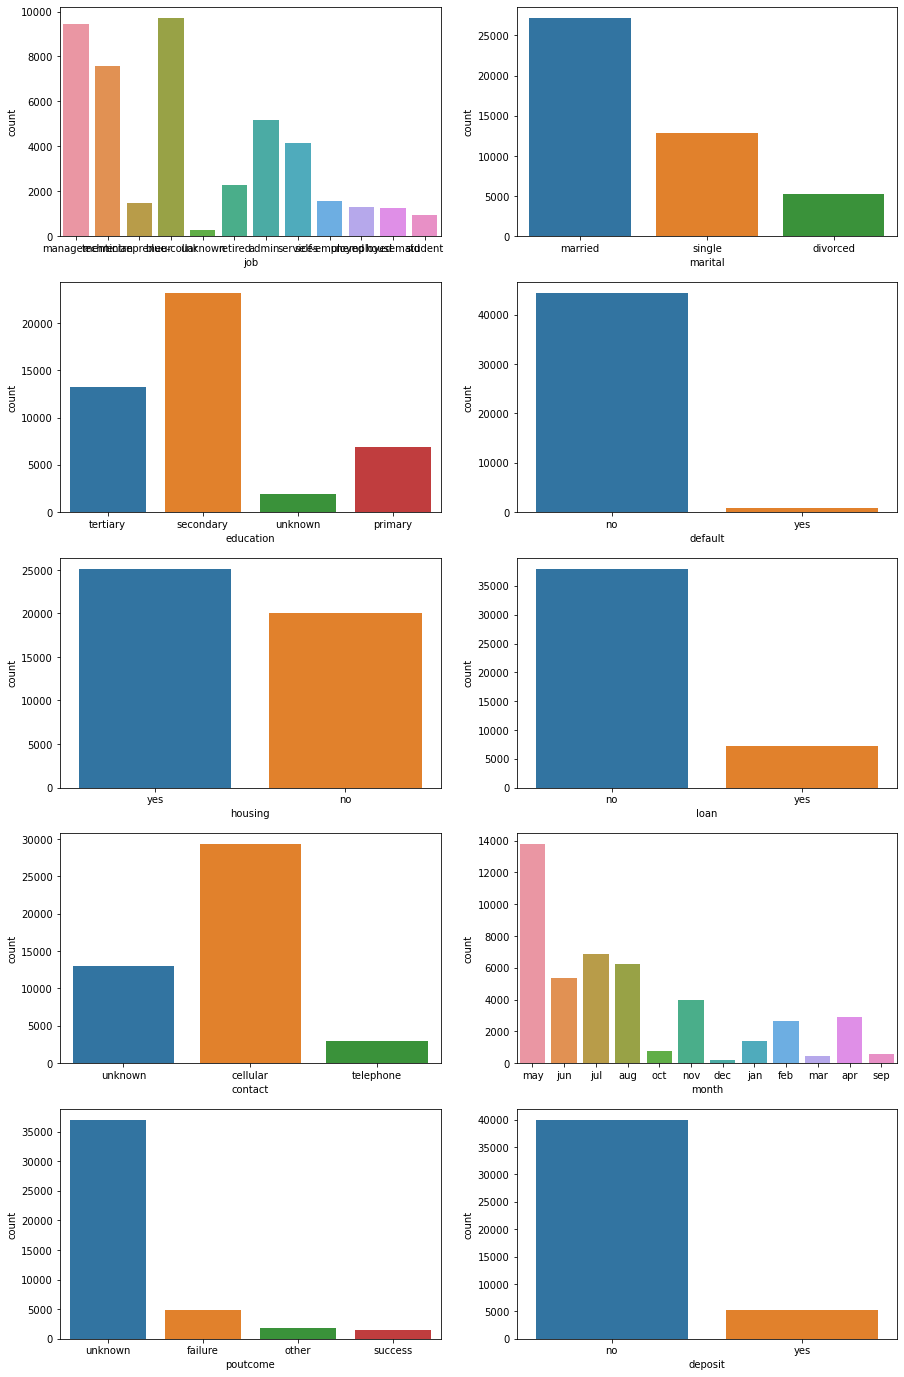

In [38]:
#Categorical feature distribution
plt.figure(figsize = (15, 60), facecolor='white')
plotnumber = 1
for col in categorical_cols:
    ax = plt.subplot(12, 2, plotnumber)
    sns.countplot(x = col, data = df)
    plotnumber += 1
plt.show()

In [39]:
for col in categorical_cols:
    print(df.groupby(['deposit',col]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

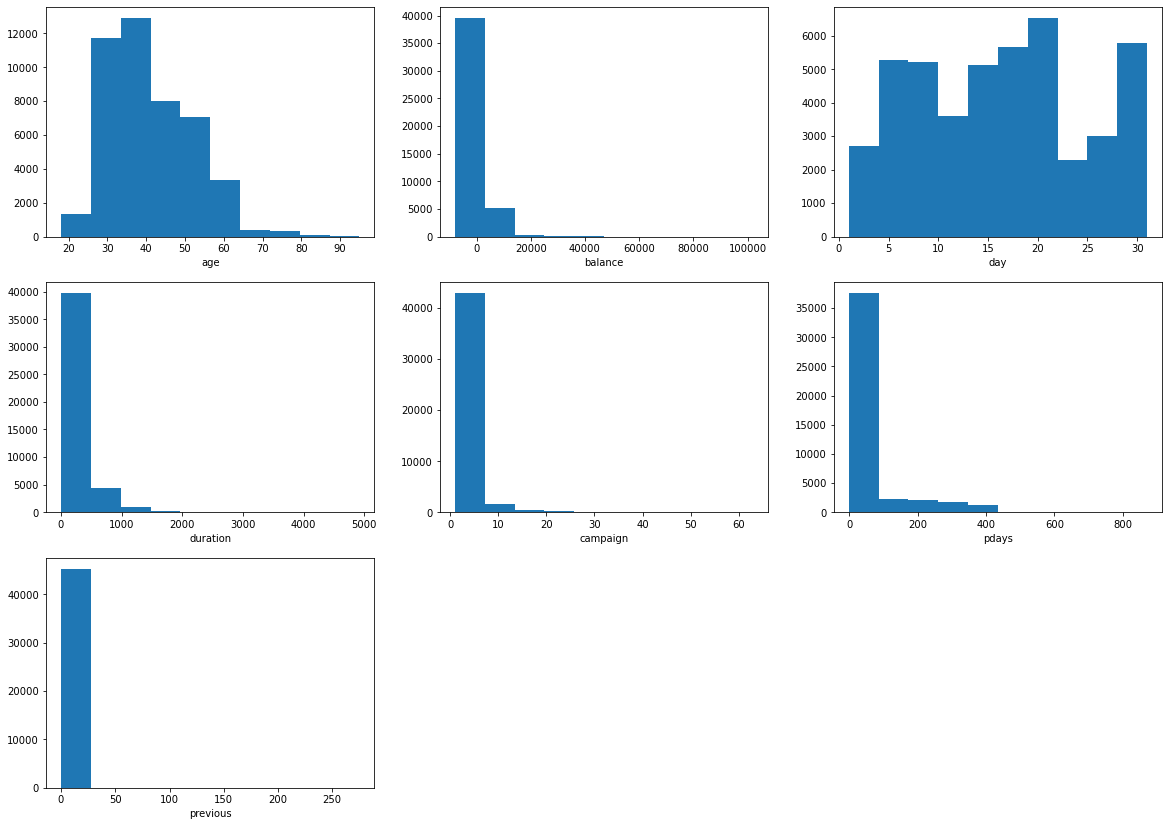

In [40]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    plt.hist(df[col])
    plt.xlabel(col)
    plotnumber+=1
plt.show()

In [41]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


In [42]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

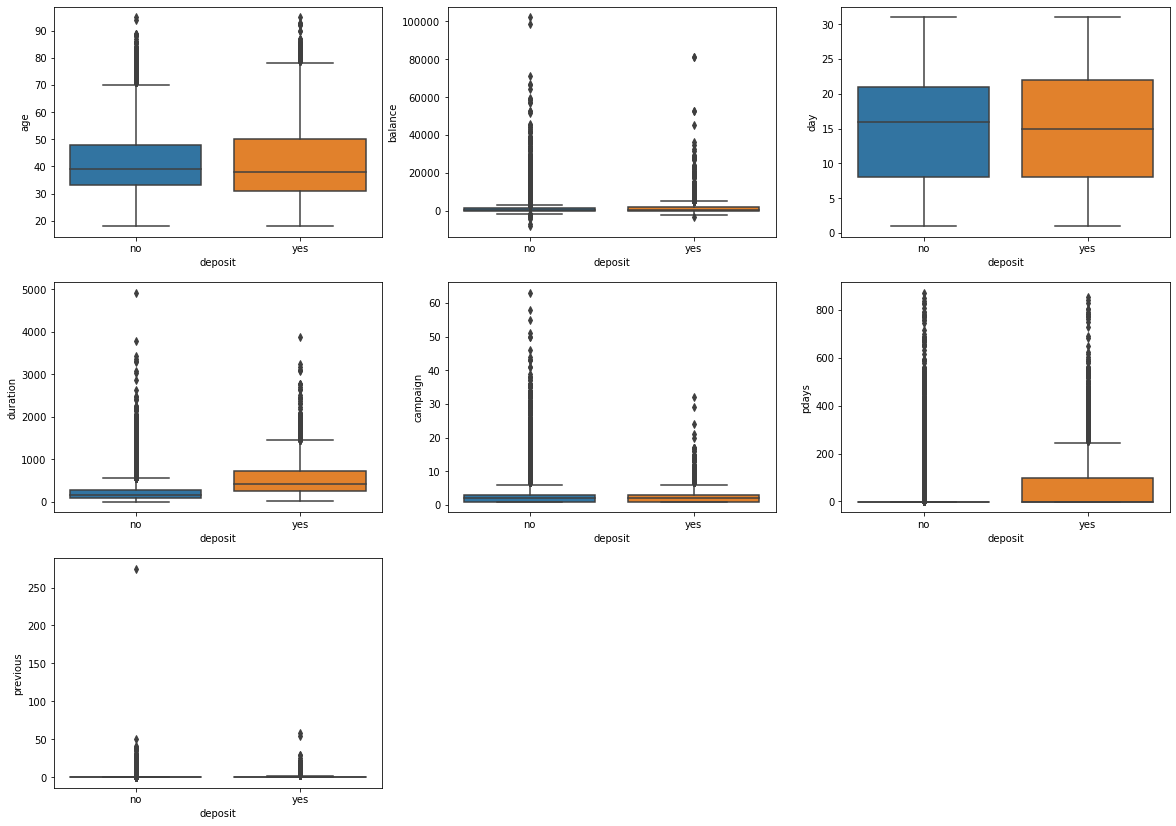

In [43]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[col], data=df)
#     plt.xlabel(col)
    plotnumber+=1
plt.show()

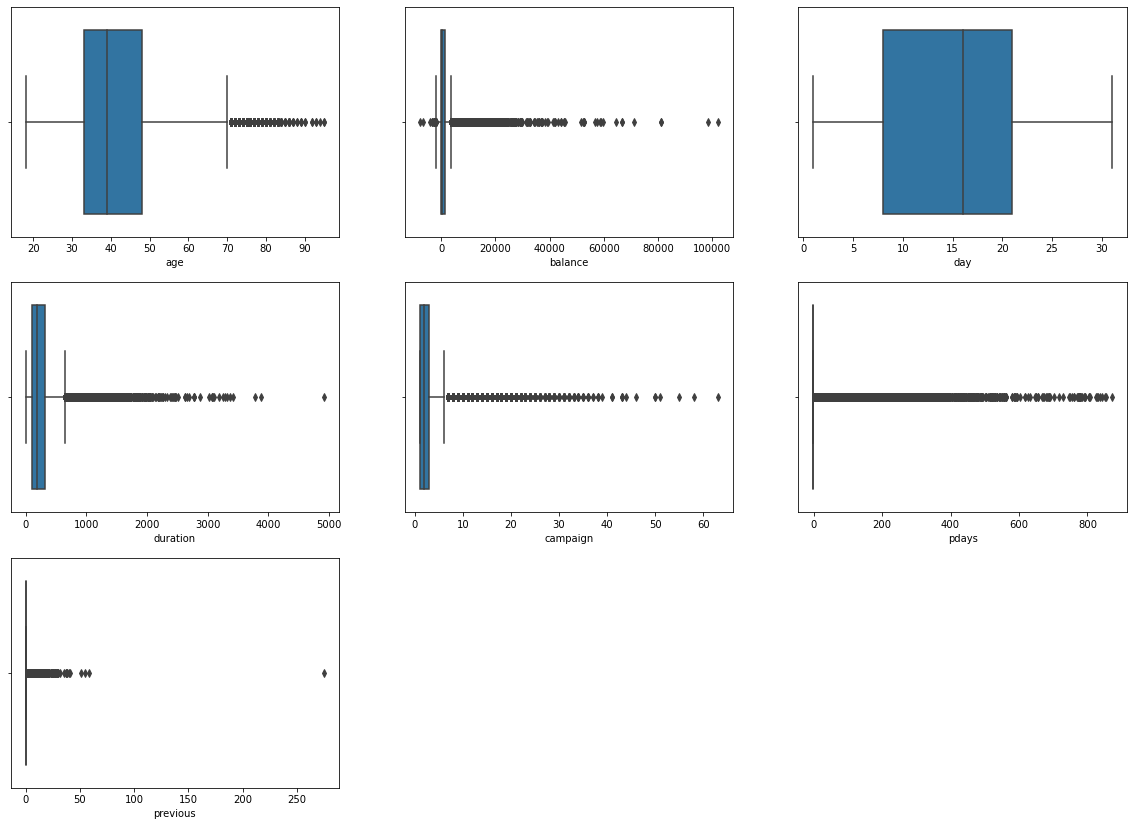

In [44]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for col in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col)
    plotnumber+=1
plt.show()

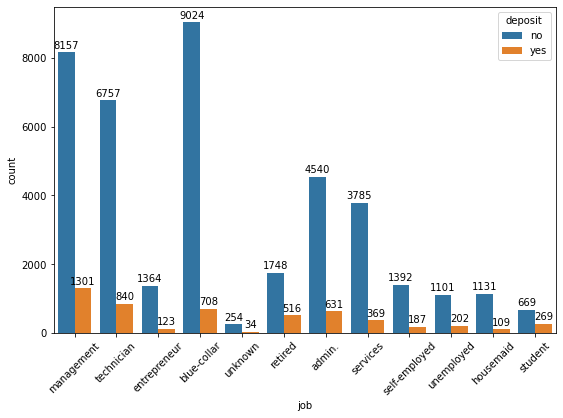

In [45]:
plt.figure(figsize = (9,6))
# total = len(df["job"])
g = sns.countplot(x = 'job', data = df, hue = 'deposit')
plt.xticks(rotation = 45)
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

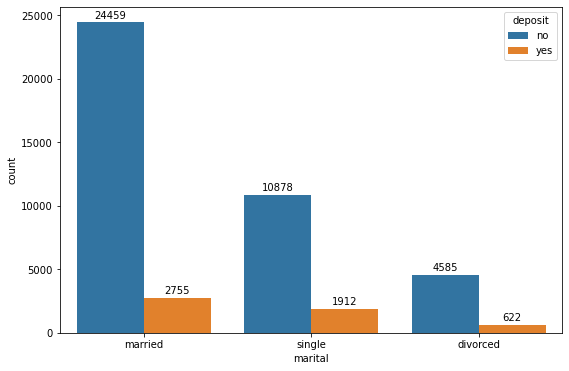

In [46]:
plt.figure(figsize = (9,6))
g = sns.countplot(x = 'marital', data = df, hue = 'deposit')
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

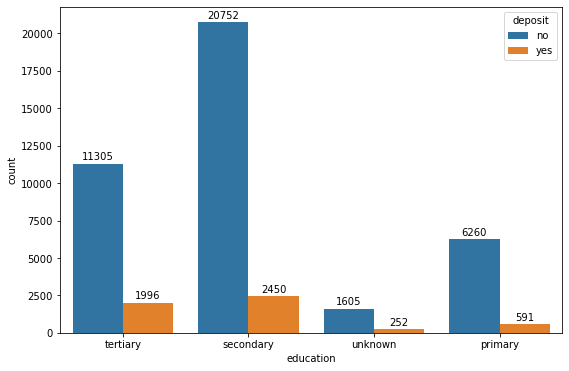

In [47]:
plt.figure(figsize = (9,6))
g = sns.countplot(x = 'education', data = df, hue = 'deposit')
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

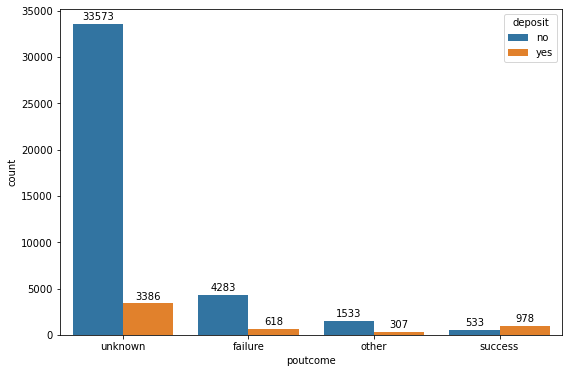

In [48]:
plt.figure(figsize = (9,6))
g = sns.countplot(x = 'poutcome', data = df, hue = 'deposit')
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

<AxesSubplot:xlabel='age', ylabel='deposit'>

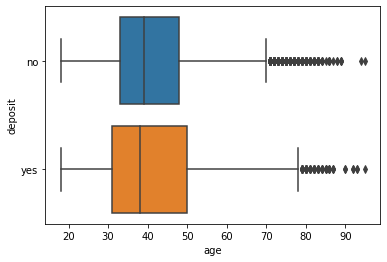

In [49]:
sns.boxplot(x="age", y="deposit", data=df, orient="h")

<AxesSubplot:xlabel='deposit', ylabel='duration'>

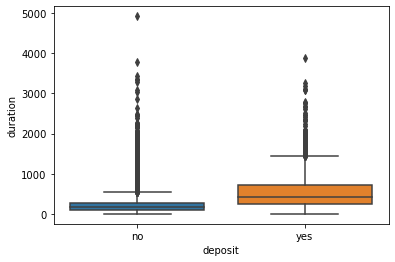

In [50]:
sns.boxplot(x = df["deposit"], y = df["duration"])

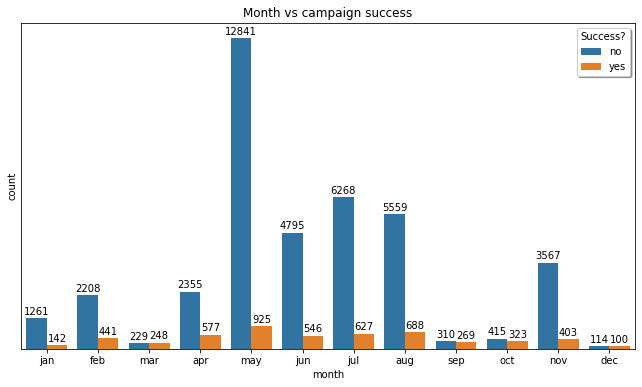

In [51]:
plt.figure(figsize=(11, 6));
plt.title('Month vs campaign success')
g = sns.countplot(x= 'month', hue = 'deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']);
plt.legend(title='Success?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
for container in g.containers:
    g.bar_label(container, padding = 2)
plt.show()

In [52]:
len(df[df['campaign'] > 33])

32

In [53]:
df1 = df[df['campaign'] < 33]

<AxesSubplot:>

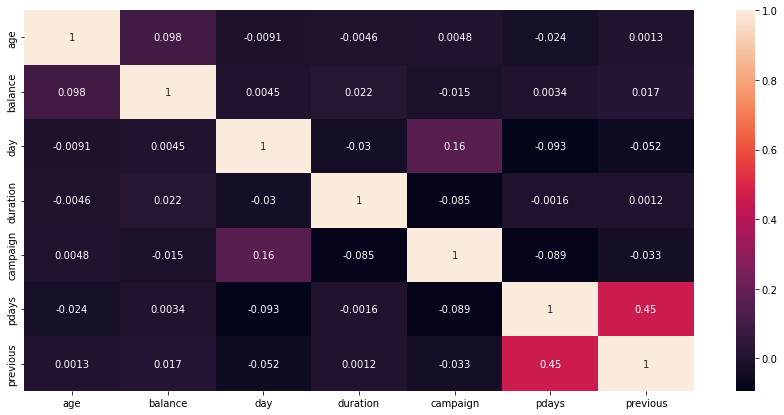

In [54]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [55]:
df1 = df1.drop(columns = ["pdays", "poutcome"])

In [57]:
X=df1.loc[:, df1.columns != 'deposit']
y=df1['deposit']

In [60]:
from sklearn.preprocessing import StandardScaler
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols)
#standard Scaler for Numerical Variables
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

In [61]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=42)

X_sampled, y_sampled = sampler.fit_resample(X, y)
pd.Series(y_sampled).value_counts().to_frame()

,deposit
no,39884
yes,39884


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(X_sampled)
X = pca.transform(X_sampled)

print(X_sampled.shape)
print(y_sampled.shape)
print(X.shape)

df_y = pd.DataFrame(data = y_sampled, columns = ['deposit'])

df_X = pd.DataFrame(data = X, columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7','PC_8', 'PC_9','PC_10'])
df_X

(79768, 46)
(79768,)
(79768, 10)


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.442526,1.325051,-0.036766,-0.957272,-1.217174,0.030870,0.781195,-1.666674,0.324186,0.122003
1,-0.806172,-0.481408,0.065942,-1.103582,-1.139343,-0.086262,1.059935,0.050024,1.158056,-0.466799
2,-1.095321,-1.047163,0.074245,-1.034473,-1.170826,0.051546,1.388411,-0.045403,-0.190780,0.538970
3,-1.061496,0.344530,-0.026736,-0.974884,-1.257735,0.050692,1.354873,-0.689871,0.257694,0.549731
4,-0.647012,-1.035860,0.266308,-0.678921,-1.260476,-0.149234,-0.185031,-0.054219,1.364172,0.656097
...,...,...,...,...,...,...,...,...,...,...
79763,0.282773,-0.960839,0.664008,-0.362719,-1.352544,0.207879,-1.524946,-0.545225,0.285371,-0.180156
79764,-0.093673,-1.375747,0.644717,-0.202031,-1.278602,-0.205143,-1.154910,-0.703009,0.403924,-0.009343
79765,-0.124748,1.479099,-0.104726,-1.371691,-1.056552,0.281083,-0.185947,0.704995,0.152231,0.296489
79766,0.969593,-1.239816,2.017345,0.314715,1.424940,0.247711,0.208632,-0.806968,0.435681,-0.452378


In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, auc, roc_curve

In [85]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df_y['deposit'] = le.fit_transform(df_y['deposit'])

In [107]:
def model_classifier(model, X, y):
    """
    Creates folds manually, perform 
    Returns an array of validation (recall) scores
    """
#     if cv == 'kf':
    cv = KFold(n_splits = 10, shuffle = True, random_state = 4)
#     elif cv == 'skf':
#         cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)
#     else:
#         cv == None
    
    scores = []
    
    
    for train_index,test_index in cv.split(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
#         X_train,X_test = X.loc[train_index],X.loc[test_index]
#         y_train,y_test = y.loc[train_index],y.loc[test_index]

        # Fit the model on the training data
        model_obj = model.fit(X_train, y_train)
        y_pred = model_obj.predict(X_test)
        # Score the model on the validation data
        score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        scores.append(score)
        mean_score = np.array(scores).mean()
        
    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print(report)
    
    print('\n Confusion Matrix of the model')
    print(conf_matrix)
#     plt.figure(figsize = (4, 5))

#     probs = model_obj.predict_proba(X_test)
#     preds = probs[:,1]
#     fpr, tpr, _ = roc_curve(y_test, preds)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.ylabel('True Positive Rate',fontsize=15)
#     plt.xlabel('False Positive Rate',fontsize=15)
#     plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)
#     plt.show()
    plt.figure(figsize = (4, 5))

    probs = model_obj.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
#     plt.title('ROC Random Forest',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)
    plt.show()
    fig = plot_decision_regions(X=X, y=y, clf=model_obj, legend=2)
    plt.title(lab)
    plt.show()

[02:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

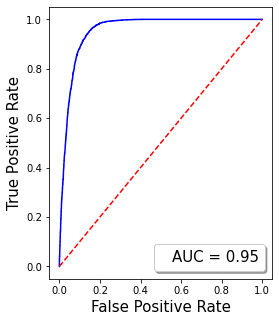

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

In [108]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

model_classifier(xgb, df_X, df_y)

# model_classifier(xgb, df_X,df_y, 'skf')

Accuracy scores of the model: 0.96

 Classification report of the model
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9971
           1       0.93      1.00      0.96      9971

    accuracy                           0.96     19942
   macro avg       0.96      0.96      0.96     19942
weighted avg       0.96      0.96      0.96     19942


 Confusion Matrix of the model
[[9243  728]
 [  26 9945]]


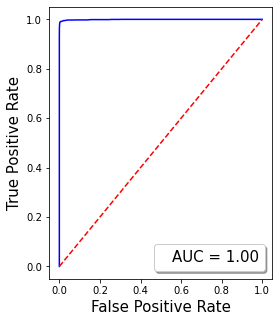

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_classifier(rf, df_X, df_y)

Accuracy scores of the model: 0.81

 Classification report of the model
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      9971
           1       0.80      0.81      0.81      9971

    accuracy                           0.81     19942
   macro avg       0.81      0.81      0.81     19942
weighted avg       0.81      0.81      0.81     19942


 Confusion Matrix of the model
[[8006 1965]
 [1888 8083]]


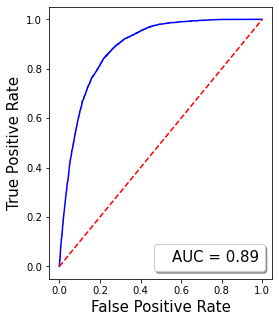

In [103]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
model_classifier(abc, df_X, df_y)

In [106]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
# gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(14,10))
# labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network']
# for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
#                          labels,
#                          [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
# clf.fit(X, y)
# ax = plt.subplot(gs[grd[0], grd[1]])
fig = plot_decision_regions(X=X, y=y, clf=model_obj, legend=2)
plt.title(lab)
plt.show()

NameError: name 'model_obj' is not defined

<Figure size 1008x720 with 0 Axes>